# RIW

Ce notebook contient les justifications techniques pour le SRI.

Hypothèses simplificatrices (parce qu'il y a beaucoup de dossiers)

* Je ne prends que les fichiers HTML (1.1. LoadData)

* Je ne prends que le dossier 0 (1.1. Datas)

* Je ne prends que la requete 8 (3.1. requests, relevance judgements)

# Index Inversé

## Etape 1 : Prise en main des données

On commence par charger les données

In [2]:
import os


def loadData(directoryname):
    corpus = {}
    for file in os.listdir(directoryname):
        if file[-5:] == ".html":
            with open(directoryname + file, 'r') as f:
                # A completer
                doc = f.readlines()
                corpus[file] = doc[0]
            
    return(corpus)

In [3]:
sample_file = "3dradiology.stanford.edu_patient_care_case_studies.html"
sample_text = "case studies patient care 3dq radiology laboratory stanford university school of medicine stanford school of medicine 3d and quantitative imaging in the department of radiology search this site only stanford medical sites ways to give find a person alumni lane library ways to give find a person case studies fmd pulmonary avm you are here stanford medicine school of medicine departments radiology 3dq laboratory patient care navigation for this section 3dq laboratory home education research patient care overview for physicians for patients protocol development 3dq management software case studies testimonials industry about us site navigation home education overview visiting fellowships reading list research overview research activities research opportunities patient care overview for physicians for patients protocol development 3dq management software case studies testimonials industry overview infrastructure and services about us faculty and staff history of the lab resources and equipment contact information jobs getting to the 3dq lab stanford medicine resources stanford medicine getting care overview find a physician find a clinical care center stanford hospital & clinics lucile packard children's hospital emergency research overview school of medicine news & resources clinical trials departments institutes & centers faculty profiles education & training overview school of medicine programs admissions continuing medical education alumni lane medical library community overview stanford health library community newsletter volunteering public service & community partnerships renewal & new building projects about us overview news careers ways to give find a person contact us maps & directions the dean's newsletter stanford university footer links contact us directions members only 2009 stanford school of medicine terms of use powered by irt"

In [4]:
#print(loadData("../CS276/pa1-data/0/")[sample_file])
Datas = loadData("../CS276/pa1-data/0/")
print(Datas[sample_file])

case studies patient care 3dq radiology laboratory stanford university school of medicine stanford school of medicine 3d and quantitative imaging in the department of radiology search this site only stanford medical sites ways to give find a person alumni lane library ways to give find a person case studies fmd pulmonary avm you are here stanford medicine school of medicine departments radiology 3dq laboratory patient care navigation for this section 3dq laboratory home education research patient care overview for physicians for patients protocol development 3dq management software case studies testimonials industry about us site navigation home education overview visiting fellowships reading list research overview research activities research opportunities patient care overview for physicians for patients protocol development 3dq management software case studies testimonials industry overview infrastructure and services about us faculty and staff history of the lab resources and equip

## Etape 2 : Extraction du vocabulaire d'indexation

### 1. Segmentation d'un texte en mots

On segmente les textes. La fonction word_tokenize de NLTK apporte ce qu'il faut. Un raffinement possible aurait été d'éliminer les 's avec une expression régulière par exemple, mais comme ce mot va être éffacé dans la partie filtrage on a décidé de laisser tel quel

In [5]:
import nltk
from nltk.tokenize import word_tokenize

def article_word_tokenize(text):
    if type(text)!= str:
        raise Exception("The function takes a string as input data")
    else:
        # A COMPLETER
        tokens = word_tokenize(text)
        stops = ['.', ',']
        for stop in stops:
            while stop in tokens:
                del tokens[tokens.index(stop)]
        return tokens

In [6]:
print(article_word_tokenize(Datas[sample_file]))

['case', 'studies', 'patient', 'care', '3dq', 'radiology', 'laboratory', 'stanford', 'university', 'school', 'of', 'medicine', 'stanford', 'school', 'of', 'medicine', '3d', 'and', 'quantitative', 'imaging', 'in', 'the', 'department', 'of', 'radiology', 'search', 'this', 'site', 'only', 'stanford', 'medical', 'sites', 'ways', 'to', 'give', 'find', 'a', 'person', 'alumni', 'lane', 'library', 'ways', 'to', 'give', 'find', 'a', 'person', 'case', 'studies', 'fmd', 'pulmonary', 'avm', 'you', 'are', 'here', 'stanford', 'medicine', 'school', 'of', 'medicine', 'departments', 'radiology', '3dq', 'laboratory', 'patient', 'care', 'navigation', 'for', 'this', 'section', '3dq', 'laboratory', 'home', 'education', 'research', 'patient', 'care', 'overview', 'for', 'physicians', 'for', 'patients', 'protocol', 'development', '3dq', 'management', 'software', 'case', 'studies', 'testimonials', 'industry', 'about', 'us', 'site', 'navigation', 'home', 'education', 'overview', 'visiting', 'fellowships', 'read

### 2. Filtrage des mots vides

On filtre les mots vides du texte en calculant les mots de plus forte occurence. On se rend compte avec la visualisation que les 10 premiers mots les plus courants le sont de très loin comparé au reste qui ont des fréquences d'occurence plus resserées.

Au vu du contenu des requetes, qui sont surtout des mots vides tels que 'a', 'the', on a décidé de ne pas supprimer trop de mots vides, sinon l'efficacité de la recherche s'en trouverait affecté, il s'agit ici d'un fine tuning.

In [7]:
from collections import Counter
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def count_frequency(collection):
    # A completer
    tokens_count = Counter()
    for doc in collection.keys():
        tokens = collection[doc].split()
        tokens_count += Counter(tokens)
    return tokens_count

def common_word(collection, n):
    return count_frequency(collection).most_common(n)

def visualize_collection_common(collection, n):
    common_words = common_word(collection, n)
    corpus_common_words = [word[0] for word in common_words]
    corpus_common_counts = [word[1] for word in common_words]
    
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 12))


    sns.barplot(x=corpus_common_counts, y=corpus_common_words)
    plt.title('Most Common Tokens in the Stanford Corpus');

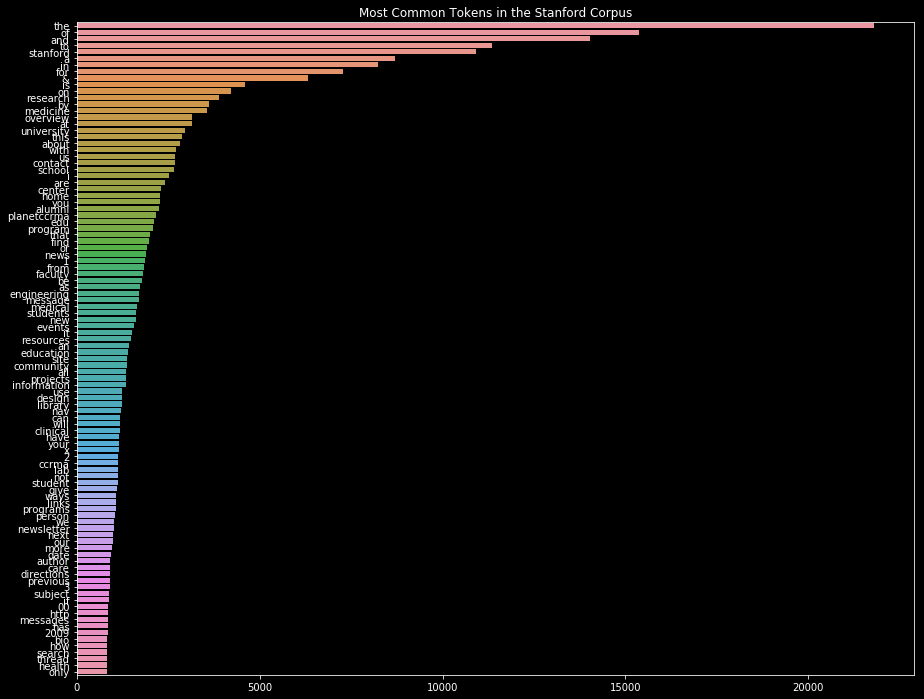

In [8]:
visualize_collection_common(Datas, 100)

In [9]:
def remove_stop_words(collection, stop_word_file):
    # TO COMPLETE
    collection_filtered = {}
    for doc in collection.keys():
        tokens = collection[doc].split()
        for stop in stop_word_file:
            while stop in tokens:
                del tokens[tokens.index(stop)]
        tokens = " ".join(tokens)
        collection_filtered[doc] = tokens
        
    return collection_filtered



In [10]:
frequent_words = [word[0] for word in common_word(Datas, 20)]
filtered_collection_frequent = remove_stop_words(Datas, frequent_words)


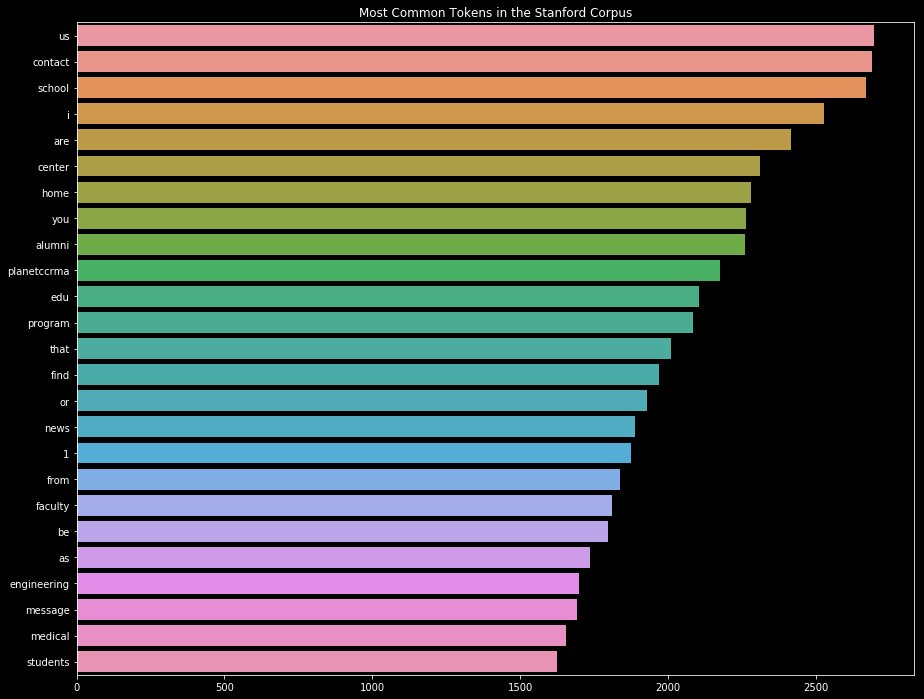

In [11]:
visualize_collection_common(filtered_collection_frequent, 25)

### 3. Normalisation des termes

On normalise les termes a l'aide de la racinisation et la lemmatisation, étape nécessaire pour condenser les mots similaires et obtenir de meilleurs résultats.

In [12]:
from nltk.stem import PorterStemmer

def collection_stemming(segmented_collection):
    stemmer = PorterStemmer () # initialisation d'un stemmer
    stemmed_collection = {}
    # a completer
    for doc in segmented_collection.keys():
        tokens = segmented_collection[doc].split(' ')
        stemmed_words = [stemmer.stem(word) for word in tokens]
        stemmed_string = " ".join(stemmed_words)
        stemmed_collection[doc] = stemmed_string
    return stemmed_collection

# test sur la collection TIME filtrée des mots vides

# a completer
stemmed_collection = collection_stemming(filtered_collection_frequent)

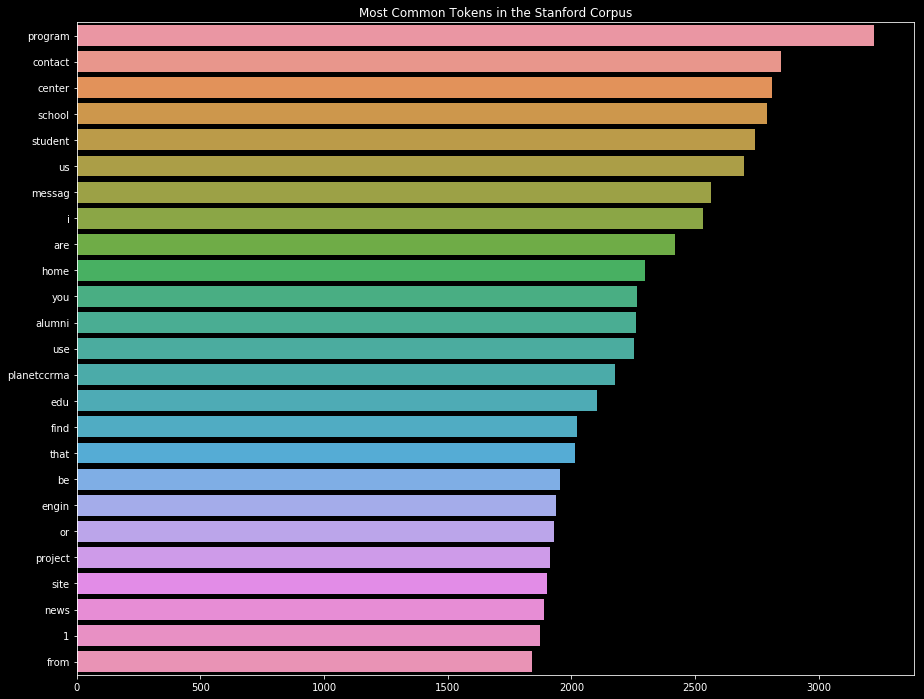

In [13]:
visualize_collection_common(stemmed_collection, 25)

In [14]:
from nltk.stem import WordNetLemmatizer

def collection_lemmatize(segmented_collection):
    stemmer = WordNetLemmatizer () # initialisation d'un lemmatiseur
    # a completer
    lemmatized_collection = {}
    # a completer
    for doc in segmented_collection.keys():
        tokens = segmented_collection[doc].split(' ')
        lemmatized_words = [stemmer.lemmatize(word) for word in tokens]
        lemmatized_string = " ".join(lemmatized_words)
        lemmatized_collection[doc] = lemmatized_string
    return lemmatized_collection

# test sur la collection TIME filtrée des mots vides

# a completer
lemmatized_collection = collection_lemmatize(stemmed_collection)

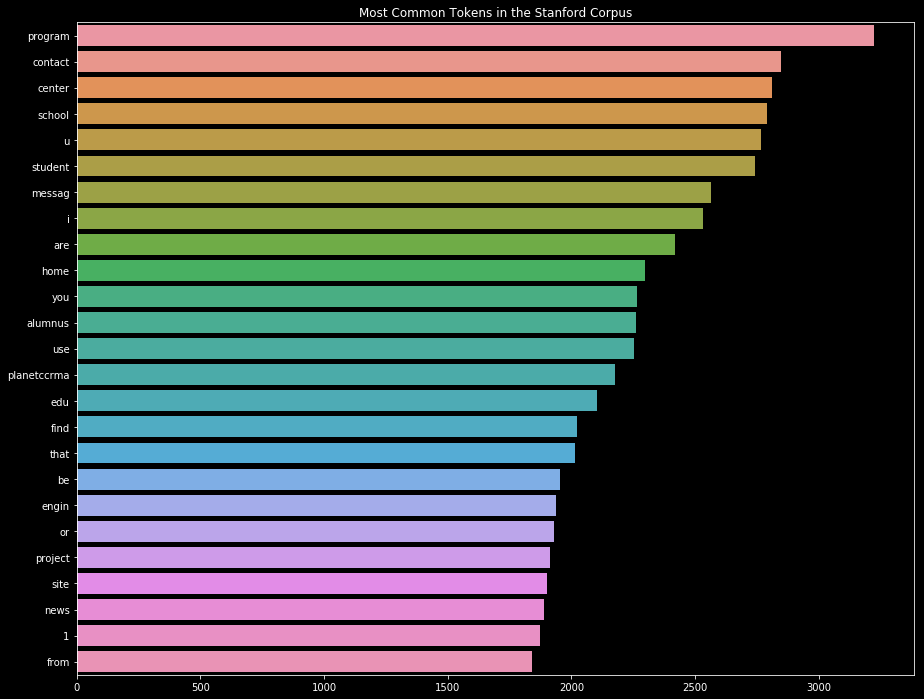

In [15]:
visualize_collection_common(lemmatized_collection, 25)

### 4. Extraction du vocabulaire

On extrait le vocabulaire du corpus.

In [16]:
def extract_indexation_vocabulary(processed_collection):
    vocabulary = set()
    # a completer
    for doc in processed_collection.keys():
        vocabulary.update(processed_collection[doc].split(" "))
    return vocabulary

In [17]:
vocabulary_stanford = extract_indexation_vocabulary(lemmatized_collection)

## Etape 3 : Etude des lois de puissance du corpus

### 1. Récupération des données

On va dans cette partie calculer les lois de puissances du corpus. Pour commencer on récupère le nombre de mots distincts

In [18]:
def count_tokens(collection):
    tokens_count = 0
    terms = set()
    for text in collection.values():
        tokens = article_word_tokenize(text)
        terms.update(tokens)
    tokens_count = len(terms)
    return tokens_count

def count_terms(filtered_collection):
    terms_count = 0
    terms = set()
    for text in filtered_collection.values():
        tokens = text.split(" ")
        terms.update(tokens)
    terms_count = len(terms)
    return terms_count

In [19]:
print(count_tokens(Datas))

36586


In [20]:
print(count_terms(lemmatized_collection))

29998


In [21]:
half_corpus = {}
i = 1
for clef, item in Datas.items():
    if i <= len(Datas)/2:
        half_corpus[clef] = item
        i += 1
print(count_tokens(half_corpus))

25012


In [22]:
half_filtered_corpus = {}
i = 1
for clef, item in lemmatized_collection.items():
    if i <= len(lemmatized_collection)/2:
        half_filtered_corpus[clef] = item
        i += 1
print(count_terms(half_filtered_corpus))

20378


### 2. Calcul de la loi de Heap

Loi de Heap : $$V_{R}(n) = {Kn^\beta}$$


Où VR est le nombre de mots distincts d'une instance de texte de taille n, K et beta sont des parametres empiriques, compris en général respectivement entre 10 et 100 et entre 0,4 et 0,6

$$=>
\left\{
\begin{array}{r c l}
V_{R}(n) = {Kn^\beta}\\
V_{R}({n\over 2}) = {K({n \over 2})^\beta}
\end{array}
\right.
=>
{V_{R}(n) \over V_{R}({n\over 2})} = 2^\beta
=>
\left\{
\begin{array}{r c l}
\beta = {log({V_{R}(n) \over V_{R}({n\over 2})}) \over log(2)}\\
K = {V_{R}(n) \over n^\beta}
\end{array}
\right.
$$

In [23]:
import math


def calcul_Heap(unfiltered_corpus, corpus, demi_corpus):
    rang_n = count_terms(corpus)
    rang_demi = count_terms(demi_corpus)
    beta = math.log(rang_n / rang_demi) / math.log(2)
    K = rang_n / count_tokens(Datas) ** beta
    return beta, K

In [24]:
print(calcul_Heap(Datas, lemmatized_collection, half_filtered_corpus))


(0.5578538527830503, 85.3944185172946)


### 3. Tracé de la courbe de Zipf

On trace la loi de zipf : la fréquence d'un terme en fonction de son rang
On trace également la version logarithmique de la loi de Zipf, car parmi les termes de premiers rangs la variation de fréquence est forte ce qui provoque l'apparition d'un coude. Le tracé logarithmique permet de réduire l'intensité de ce coude, graphiquement.

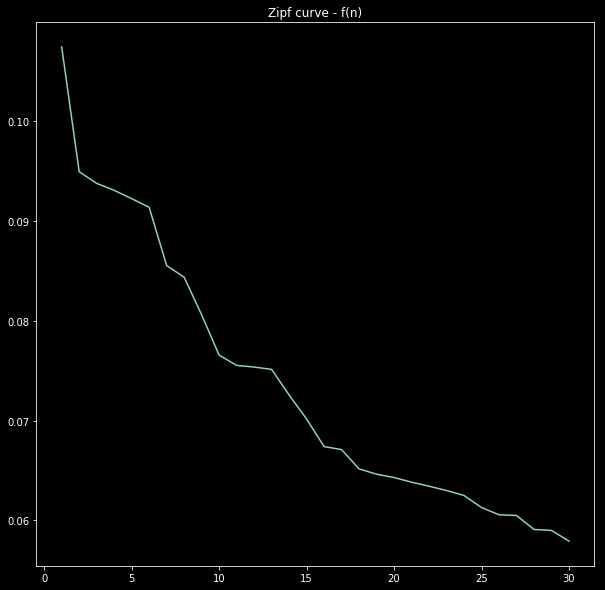

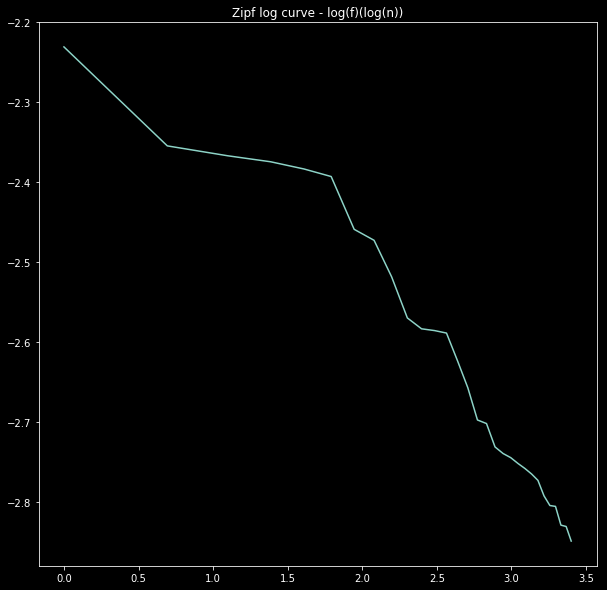

In [25]:
N = count_terms(lemmatized_collection)
count = common_word(lemmatized_collection, 30)

corpus_frequency = [word[1] / N for word in count]
corpus_rank = [i for i in range(1, 31)]

plt.figure(figsize=(10,10))
plt.plot(corpus_rank, corpus_frequency)
plt.title('Zipf curve - f(n)');
plt.show()

corpus_log_frequency = [math.log(word[1] / N) for word in count]
corpus_log_rank = [math.log(i) for i in range(1, 31)]

plt.figure(figsize=(10,10))
plt.plot(corpus_log_rank, corpus_log_frequency)
plt.title('Zipf log curve - log(f)(log(n))');
plt.show()

## Etape 4 : Construction de l'index inversé

Enfin on sauvegarde les données dans des index inversés, de fréquence et de position.

In [26]:
from collections import OrderedDict

def build_inverted_index(collection,type_index):
    # On considère ici que la collection est pré-traitée
    inverted_index=OrderedDict()
    if type_index == 1:
        for document in collection:
            for term in collection[document]:
                if term in inverted_index.keys():
                    if document not in inverted_index[term]:
                        inverted_index[term].append(document)
                else:
                    inverted_index[term]=[document]
    elif type_index ==2:
        for document in collection:
            for term in collection[document]:
                if term in inverted_index.keys():
                    if document in inverted_index[term].keys():
                        inverted_index[term][document] = inverted_index[term][document] + 1
                    else:
                        inverted_index[term][document]= 1
                else:
                    inverted_index[term]=OrderedDict()
                    inverted_index[term][document]=1
    elif type_index==3:
        for document in collection:
            n=0
            for term in collection[document]:
                n = n+1
                if term in inverted_index.keys():
                    if document in inverted_index[term].keys():
                        inverted_index[term][document][0] = inverted_index[term][document][0] + 1
                        inverted_index[term][document][1].append(n)
                    else:
                        inverted_index[term][document]= [1,[n]]
                else:
                    inverted_index[term]=OrderedDict()
                    inverted_index[term][document]=[1,[n]]
                    
    return inverted_index

In [27]:
lemmatized_tokens = {}
for document in lemmatized_collection:
    lemmatized_tokens[document] = lemmatized_collection[document].upper().split(" ")
index_inverse = build_inverted_index(lemmatized_tokens, 1)
index_frequence = build_inverted_index(lemmatized_tokens, 2)
index_position = build_inverted_index(lemmatized_tokens, 3)

In [28]:
print(index_inverse["COMPUT"])

['cmgm.stanford.edu_pbrown_Lab_member_profiles_Julia_Salzman.html', 'biox.stanford.edu_clark_latombe.html', 'biox.stanford.edu_news_bugle.html', 'crc.stanford.edu_blank.html', 'cee.stanford.edu_current_phd_deg_prog.html', 'cll.stanford.edu_symposia_creativity_schedule.html', 'adl.stanford.edu_people_YoungjunKim.html', 'aero-comlab.stanford.edu_media.html', 'ccrma-mail.stanford.edu_pipermail_stk_2003-July_000111.html', 'cmgm.stanford.edu_tech_br_classes.html', 'ai.stanford.edu_users_sahami_CS2013_documents.html', 'clandininlab.stanford.edu_research.html', 'biochem218.stanford.edu_Homework%252001.html', 'cee.stanford.edu_programs_efmh_seminars_efml_nooners.html', 'biox.stanford.edu_clark_faculty.html', 'aero-comlab.stanford.edu_kasidit_awards_commencementawards2004.html', 'bioengineering.stanford.edu_coulter_chair.html', 'ccrma-mail.stanford.edu_pipermail_planetccrma_2008-November_015167.html', 'asia.stanford.edu_events_Spring04_bios_ladermanBio.html', 'biox.stanford.edu_clark_faculty_p2

In [29]:
import pickle

# Ecriture sur disque
def save_inverted_index_pickle(inverted_index, filename):
     with open(filename, "wb") as f:
            pickle.dump(inverted_index,f)
            f.close()
    

# Chargement

def load_inverted_index_pickle(filename):
    with open(filename, 'rb') as fb:
        index = pickle.load(fb)
        return index

In [30]:
save_inverted_index_pickle(index_inverse, 'inverted_index.pickle')
save_inverted_index_pickle(index_frequence, 'inverted_frequency.pickle')
save_inverted_index_pickle(index_position, 'inverted_position.pickle')

# Modèle

## Modèle Booléen

On construit le modèle derecherche Booléen

In [31]:
from tt import BooleanExpression


def transformation_query_to_postfixe(query):
    b = BooleanExpression(query)
    return b.postfix_tokens

In [32]:
def transformation_lem_query_to_boolean(query):
    boolean_query=[]
    for token in query:
        boolean_query.append(token)
        boolean_query.append('AND')
    boolean_query.pop()
    return boolean_query

In [33]:
def merge_and_postings_list(posting_term1,posting_term2):
    result=[]
    n = len(posting_term1)
    m = len(posting_term2)
    i = 0
    j = 0
    while i < n and j <m:
        if posting_term1[i] == posting_term2[j]:
            result.append(posting_term1[i])
            i = i+1
            j = j+1
        else:
            if posting_term1[i] < posting_term2[j]:
                i = i+1
            else:
                j=j+1
    return result

In [34]:
def boolean_operator_processing_with_inverted_index(BoolOperator,posting_term1,posting_term2):
    result=[]
    if BoolOperator == "AND":
        result.append(merge_and_postings_list(posting_term1,posting_term2))
    elif BoolOperator=="OR" :
        result.append(merge_or_postings_list(posting_term1,posting_term2))
    elif BoolOperator == "NOT":
        result.append(merge_and_not_postings_list(posting_term1,posting_term2))
    return result

In [35]:
def processing_boolean_query_with_inverted_index(booleanOperator,query, inverted_index):
    relevant_docs = {}
    evaluation_stack = []
    for i, term in enumerate(query):
        if term.upper() not in booleanOperator:
            evaluation_stack.append(inverted_index[term.upper()])
        else:
            if term.upper() == "NOT":
                operande = evaluation_stack.pop()
                eval_prop = boolean_operator_processing_with_inverted_index(term.upper(), evaluation_stack.pop(), operande)
                evaluation_stack.append(eval_prop[0])
                evaluation_stack.append(eval_prop[0])
            else:
                operator = term.upper()
                eval_prop = boolean_operator_processing_with_inverted_index(operator, evaluation_stack.pop(), query[i+1])
                evaluation_stack.append(eval_prop[0])
    return  evaluation_stack.pop()

## Modèle Vectoriel

On construit le modèle de recherche Vectoriel

In [129]:
from math import log

def get_tf(term,doc_ID,index_frequence):
    return index_frequence[term][doc_ID]

def get_tf_logarithme_normalise(term,doc_ID, index_frequence,stats_collection):
        tf = get_tf(term,doc_ID, index_frequence)
        tf_logarithme_normalise = (1 +log(tf))/(1 + log(stats_collection[term]["freq_moy"]))
        return tf_logarithme_normalise


def get_idf(term,index_frequence,nb_doc):
    return log(nb_doc/len(index_frequence[term].keys()))

def get_tf_normalise(term, doc_ID, index_frequence, stats_collection):
    tf = get_tf(term, doc_ID, index_frequence)
    tf_normalise = 0.5 + 0.5 * (tf / stats_collection[term]["freq_max"])
    return tf_normalise

In [37]:
def get_stats_document(document):
    counter= Counter()
    for term in document:
        counter.update([term])
    stats={}
    stats["freq_max"] = counter.most_common(1)[0][1]
    stats["unique_terms"] = len(counter.items())
    tf_moy = sum(counter.values())
    stats["freq_moy"] = tf_moy/len(counter.items())
    return stats

In [38]:
def get_stats_collection(collection):
    stats={}
    stats["nb_docs"]=len(collection.keys())
    for doc in collection:
        stats[doc] = get_stats_document(collection[doc])
    return stats

In [39]:
def remove_non_index_term(query,inverted_index):
    query_filt=[]
    for token in query:
        if token in inverted_index:
            query_filt.append(token)
    return query_filt

In [40]:
def pre_processed_query(query,inverted_index):
    tokenized_query = article_word_tokenize(query)
    filt_query = remove_non_index_term(tokenized_query,inverted_index)
    filtered_query = remove_stop_words({"query":" ".join(filt_query)},frequent_words)
    normalized_query = collection_lemmatize(filtered_query)
    return normalized_query["query"]

In [133]:
def processing_vectorial_query(query, inverted_index, stats_collection, weighting_scheme_document,weighting_scheme_query, frequency_index=index_frequence):
    relevant_docs = {}
    counter_query= Counter()
    query_pre_processed = pre_processed_query(query.upper(),inverted_index)
    nb_doc = stats_collection["nb_docs"]
    norm_query=0.
    for term in query_pre_processed:
        if term in inverted_index:
            w_term_query=0.
            counter_query.update([term])
            if weighting_scheme_query=="binary":
                w_term_query = 1
            if weighting_scheme_query=="frequency":
                w_term_query = counter_query[term]
            norm_query = norm_query + w_term_query*w_term_query
            for doc in inverted_index[term]:
                w_term_doc = 0.
                relevant_docs[doc]=0.
                if weighting_scheme_document=="binary":
                    w_term_doc=1
                if weighting_scheme_document=="frequency":
                    w_term_doc = get_tf(term,doc,frequency_index)
                if weighting_scheme_document=="tf_idf_normalize":
                    w_term_doc = get_tf_normalise(term,doc, frequency_index,stats_collection)*get_idf(term,frequency_index,nb_doc)
                if weighting_scheme_document=="tf_idf_logarithmic":
                    w_term_doc = get_tf_logarithmique (term,doc, frequency_index)*get_idf(term,frequency_index,nb_doc)
                if weighting_scheme_document=="tf_idf_logarithmic_normalize":
                    w_term_doc = get_tf_logarithme_normalise (term,doc, frequency_index,stats_collection)*get_idf(term,frequency_index,nb_doc)
                relevant_docs[doc] = relevant_docs[doc] + w_term_doc*w_term_query
    ordered_relevant_docs = OrderedDict(sorted(relevant_docs.items(), key=lambda t: t[1], reverse=True))
    return ordered_relevant_docs

In [127]:
stat_of_collection = get_stats_collection(index_document)

# Evaluation

## Récupération des données

On commence par récupérer les données que l'on a filtré précédemment. Les jugements de pertinences utiles pour la réalisation de ces modèles seront les résultats d'output de query qui nous sont fournis.

In [44]:
index_document = load_inverted_index_pickle("inverted_index.pickle")
index_frequence = load_inverted_index_pickle("inverted_frequency.pickle")
index_position = load_inverted_index_pickle("inverted_position.pickle")

In [45]:
def load_relevance_judgments(filename, requests):
    relevance_judgments = {}
    # A completer
    with open(filename) as f:
        doc = f.readlines()
        for request in requests:
            relevance_judgments[request] = []
            for line in doc:
                if line[0] == str(0):
                    relevance_judgments[request].append(line[2:].rstrip('\n'))
    return relevance_judgments

def traitement(requetes):
    requetes_tokenize = {}
    for request in requetes:
        requetes_tokenize[request] = " ".join(article_word_tokenize(requetes[request]))
    stop_words = frequent_words
    requetes_stop = remove_stop_words(requetes_tokenize, stop_words)
    requetes_lemmatize = collection_stemming(requetes_stop)
    traites = collection_lemmatize(requetes_lemmatize)
    return traites

In [53]:
with open("../CS276/Queries/dev_queries/query.8") as f:
    requests = {}
    requests[0] = f.read()

traite = traitement(requests)

relevance_judgments = load_relevance_judgments('../CS276/Queries/dev_output/8.out', requests)

In [54]:
vocabulary = {doc for doc in list(index_document.keys())}

In [55]:
relevance_judgments

{0: ['aa.stanford.edu_events_50thAnniversary_program.php',
  'aa.stanford.edu_news_marcoPavoneAppointed.php',
  'aa.stanford.edu_students_media_graduates_grads2008_James_Diebel.pdf',
  'aaalab.stanford.edu_child_development_dev_reasoning.html',
  'aaalab.stanford.edu_teachable.html',
  'aagsa.stanford.edu_event_microsoft-speaker-asians-workplace',
  'acomp.stanford.edu_printing',
  'adl.stanford.edu_people_YoungjunKim.html',
  'aero-comlab.stanford.edu_jameson_',
  'aero-comlab.stanford.edu_sichoi_index.html',
  'aero.stanford.edu_Lindbergh_old%2520files_intro.html',
  'ai.stanford.edu_contact.html',
  'ai.stanford.edu_forms.html',
  'ai.stanford.edu_links.html',
  'ai.stanford.edu_meetings.html',
  'ai.stanford.edu_people.html',
  'ai.stanford.edu_users_sahami_CS2013_CS2013-1-pager.pdf',
  'ai.stanford.edu_users_sahami_CS2013_committee.html',
  'aims.stanford.edu_images_speakers_11-30-11_papadopoulos_papadopoulos.pdf',
  'alumni.stanford.edu_get_page_enews_feb-2012',
  'alumni.stanfor

## Evaluation non ordonnée

L'évaluation du modèle booléen se fait à l'aide de metriques telles que le rappel, la précision, mais aussi F1 et Fbeta.

On renvoie les résultats et l'évaluation de ces résultats, et on se rend compte que ceux ci ne sont pas très bons, parce que dans les jugements de relevance par requete, on n'a pas appliqué les mêmes hypothèses qu'à nos données, à savoir qu'on ne prend en compte que les fichiers html du dossier 0.

Quand on effectue ce filtrage, on trouve de meilleurs valeurs pour notre modèle : un rappel qui tend vers 1. La precision reste basse (0.2) mais c'est normal, car cela ne dépend pas de la taille du nombre de jugements de relevance

In [56]:
def evaluate_boolean_model(requests, collection_index, relevance_judgments, BooleanOperator):
    evaluation_boolean = {}
    # A completer
    for request in requests:
        boolean_request = transformation_lem_query_to_boolean(requests[request])
        result = []
        for word in boolean_request:
            if not(word == "U.S" or word.upper() not in vocabulary or word is int):
                result.append(word)
        print(result)
        request_with_operator = processing_boolean_query_with_inverted_index(BooleanOperator, result, collection_index)
        results = [0 for i in range(len(request_with_operator))]
        for i, doc in enumerate(request_with_operator):
            if doc in relevance_judgments[request]:
                results[i] = 1
        recall = np.cumsum(results) / len(relevance_judgments[request])
        precision = np.cumsum(results) / len(results)
        F1 = 2 / ((1 / precision) + (1 / recall))
        beta = .5
        Fb = (1 + beta ** 2) * precision * recall / (beta ** 2 * precision * recall)
        evaluation_boolean[request] = {"recall": recall, "precision": precision, "F1": F1, "Fb": Fb}
    return request_with_operator, evaluation_boolean


In [57]:
print(traite[0])
#traite_polonaise = {0: transformation_query_to_postfixe("comput scienc")}
evaluate_boolean_model({0: "comput scienc".split()}, index_document, relevance_judgments, "AND")

comput scienc
['comput', 'AND', 'scienc']


(['biox.stanford.edu_clark_latombe.html',
  'biox.stanford.edu_clark_zare.html',
  'bioethics.stanford.edu_education_bemh_committee.html',
  'annualreport.stanford.edu_2011_chairletter.html',
  'bdml.stanford.edu_twiki_bin_view_Rise_SpinyBot.html',
  'cheme.stanford.edu_alumni_InMemoriam.html',
  'biox.stanford.edu_forum_index.html',
  'cisl.stanford.edu_organization_about_gaba.html',
  'cll.stanford.edu_symposia_creativity_schedule.html',
  'adl.stanford.edu_people_YoungjunKim.html',
  'cmgm.stanford.edu_biochem_harbury_publications.html',
  'cmgm.stanford.edu_micro_fac_greenberg.html',
  'cancer.stanford.edu_patient_care_amenities_patientBilling.html',
  'cee.stanford.edu_seminars_index.html',
  'ai.stanford.edu_users_sahami_CS2013_documents.html',
  'biochem.stanford.edu_Job_Openings.html',
  'clinicalinformatics.stanford.edu_projects_anesthesia.html',
  'cee.stanford.edu_programs_efmh_seminars_efml_nooners.html',
  'biox.stanford.edu_clark_faculty.html',
  'arith.stanford.edu_snap.

In [74]:
def load_filtered_relevance_judgments(filename, requests):
    relevance_judgments = {}
    # A completer
    with open(filename) as f:
        doc = f.readlines()
        for request in requests:
            relevance_judgments[request] = []
            for line in doc:
                if line[0] == str(0) and line.rstrip('\n').split('.')[-1] == "html":
                    relevance_judgments[request].append(line[2:].rstrip('\n'))
    return relevance_judgments

filtered_relevance_judgments = load_filtered_relevance_judgments('../CS276/Queries/dev_output/8.out', requests)

In [75]:
filtered_relevance_judgments

{0: ['aaalab.stanford.edu_child_development_dev_reasoning.html',
  'aaalab.stanford.edu_teachable.html',
  'adl.stanford.edu_people_YoungjunKim.html',
  'aero-comlab.stanford.edu_sichoi_index.html',
  'aero.stanford.edu_Lindbergh_old%2520files_intro.html',
  'ai.stanford.edu_contact.html',
  'ai.stanford.edu_forms.html',
  'ai.stanford.edu_links.html',
  'ai.stanford.edu_meetings.html',
  'ai.stanford.edu_people.html',
  'ai.stanford.edu_users_sahami_CS2013_committee.html',
  'arith.stanford.edu_book.html',
  'arith.stanford.edu_people.html',
  'arpes.stanford.edu_inthenews_topological.html',
  'arts0910.stanford.edu_people_grad.html',
  'asia.stanford.edu_events_fall02_bio_liuBio.html',
  'asia.stanford.edu_events_fall05_bio_OzzieDiaz-Bio.html',
  'asia.stanford.edu_events_spring05_ee402t_bio_bajajBio.html',
  'asia.stanford.edu_events_spring06_ee402t_bio_chua.html',
  'atbweb.stanford.edu_atb_images_brunger_cv.html',
  'bdml.stanford.edu_twiki_bin_view_Haptics_MotionDisplayKAUST.html

In [76]:
evaluate_boolean_model({0: "comput scienc".split()}, index_document, filtered_relevance_judgments, "AND")

['comput', 'AND', 'scienc']


(['biox.stanford.edu_clark_latombe.html',
  'biox.stanford.edu_clark_zare.html',
  'bioethics.stanford.edu_education_bemh_committee.html',
  'annualreport.stanford.edu_2011_chairletter.html',
  'bdml.stanford.edu_twiki_bin_view_Rise_SpinyBot.html',
  'cheme.stanford.edu_alumni_InMemoriam.html',
  'biox.stanford.edu_forum_index.html',
  'cisl.stanford.edu_organization_about_gaba.html',
  'cll.stanford.edu_symposia_creativity_schedule.html',
  'adl.stanford.edu_people_YoungjunKim.html',
  'cmgm.stanford.edu_biochem_harbury_publications.html',
  'cmgm.stanford.edu_micro_fac_greenberg.html',
  'cancer.stanford.edu_patient_care_amenities_patientBilling.html',
  'cee.stanford.edu_seminars_index.html',
  'ai.stanford.edu_users_sahami_CS2013_documents.html',
  'biochem.stanford.edu_Job_Openings.html',
  'clinicalinformatics.stanford.edu_projects_anesthesia.html',
  'cee.stanford.edu_programs_efmh_seminars_efml_nooners.html',
  'biox.stanford.edu_clark_faculty.html',
  'arith.stanford.edu_snap.

## Evaluation ordonnée

On applique maintenant le modèle vectoriel avec différentes stratégies de poids. Comme les requetes sont courtes, on constate que la stratégie de poids sur celle ci n'a pas d'influence sur le résultat final.

In [92]:
from collections import OrderedDict

def run_model_and_evaluate(query, inverted_index, model, relevance_judgments ):
    evaluation_vectorial_request = {}
    # A completer 
    for request in query:
        stat_of_collection = get_stats_collection(inverted_index)
        weighting_scheme_document = model[0]
        weighting_scheme_query = model[1]
        request_with_operator = processing_vectorial_query(query[request], inverted_index, stat_of_collection, weighting_scheme_document, weighting_scheme_query)

        results = [0 for i in range(len(request_with_operator))]
        for i, doc in enumerate(request_with_operator):
            if doc in relevance_judgments[request]:
                results[i] = 1
        recall = np.cumsum(results) / len(relevance_judgments[request])
        precision = np.cumsum(results) / len(results)
        evaluation_vectorial_request[request] = {"recall": recall, "precision": precision}
    
    return evaluation_vectorial_request

In [102]:
results = run_model_and_evaluate({0: traite[0]}, index_document, ["binary", "binary"], filtered_relevance_judgments)

In [103]:
results

{0: {'precision': array([0.        , 0.        , 0.        , ..., 0.04315476, 0.04315476,
         0.04315476]),
  'recall': array([0.        , 0.        , 0.        , ..., 0.75652174, 0.75652174,
         0.75652174])}}

In [95]:
def draw_recall_precision_curve (query,inverted_index, model, relevance_judgments):
    # A completer.
    results = run_model_and_evaluate(query,inverted_index, model, relevance_judgments)
    plt.plot(results[0]['recall'], results[0]["precision"])
    plt.title('Precision en fonction du rappel')
    plt.show()

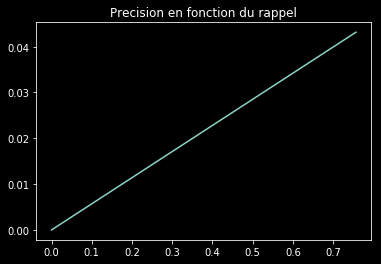

In [112]:
draw_recall_precision_curve({0: traite[0]}, index_document, ["binary", "binary"], filtered_relevance_judgments)

In [104]:
results2 = run_model_and_evaluate({0: traite[0]}, index_document, ["frequency", "frequency"], filtered_relevance_judgments)

In [105]:
results2

{0: {'precision': array([0.00049603, 0.00049603, 0.00049603, ..., 0.04315476, 0.04315476,
         0.04315476]),
  'recall': array([0.00869565, 0.00869565, 0.00869565, ..., 0.75652174, 0.75652174,
         0.75652174])}}

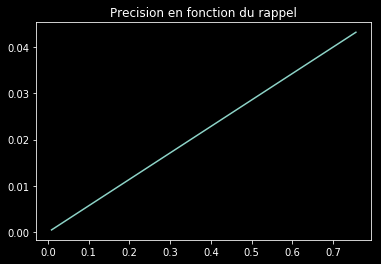

In [110]:
draw_recall_precision_curve({0: traite[0]}, index_document, ["frequency", "frequency"], filtered_relevance_judgments)

In [134]:
results3 = run_model_and_evaluate({0: traite[0]}, index_document, ["tf_idf_normalize", "frequency"], filtered_relevance_judgments)

In [135]:
results3

{0: {'precision': array([0.00049603, 0.00049603, 0.00049603, ..., 0.04315476, 0.04315476,
         0.04315476]),
  'recall': array([0.00869565, 0.00869565, 0.00869565, ..., 0.75652174, 0.75652174,
         0.75652174])}}

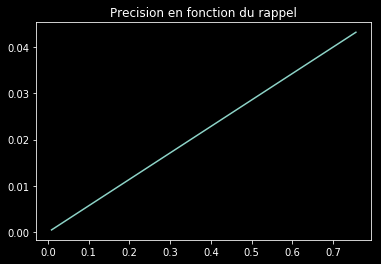

In [137]:
draw_recall_precision_curve({0: traite[0]}, index_document, ["tf_idf_normalize", "frequency"], filtered_relevance_judgments)

# Page Rank

Pour tester cette approche, il faudrait connaitre les liens entrant et sortant des pages, ce qui n'est pas le cas, donc cette partie n'est pas traitée ici

# Apprentissage : approche par point

L'entrainement du modèle a été fait dans le lab 6. Pour plus de clareté, on a recopié ici l'entrainement complet de celui ci, mais pour le script on a sauvegardé le modèle dans un fichier qu'on importe, pour ne pas avoir à le réentrainer.

On n'a malheureusement pas pu l'utiliser sur les données, car elles sont dans un format qui necessite un traitement préalable (il aurait notamment fallu que les outputs contiennent les resultats organisés par rang pour qu'on ait un moyen d'evaluer notre résultat)

## Etape 0 : Prise en main des données

In [77]:
import os

data_dir = '../CS276/pa3-data'
filename = os.path.join(data_dir, "pa3.signal.train")
with open(filename, 'r', encoding = 'utf8') as f:
    print(f.read()[0:10000])
print("...")

query: stanford aoerc pool hours
  url: http://events.stanford.edu/2014/February/18/
    title: events at stanford tuesday february 18 2014
    header: stanford university event calendar
    header: teaching sex at stanford
    header: rodin the complete stanford collection
    header: stanford rec trx suspension training
    header: memorial church open visiting hours
    header: alternative transportation counseling tm 3 hour stanford univ shc employees retirees family members
    body_hits: stanford 239 271 318 457 615 642 663 960 966 971
    body_hits: aoerc 349 401 432 530 549 578 596
    body_hits: pool 521
    body_length: 981
    pagerank: 1
  url: http://events.stanford.edu/2014/February/6/
    title: events at stanford thursday february 6 2014
    header: stanford university event calendar
    header: stanford woods environmental forum featuring roz naylor
    header: stanford school of earth sciences alumni reception at nape
    header: an evening with stanford alumnus and p

In [78]:
import os
import sys
from Utils.base_classes.load_train_data import load_train_data
from Utils.base_classes.query import Query

data_dir = '../CS276/pa3-data'
file_name = os.path.join(data_dir, "pa3.signal.train")
query_dict = load_train_data(file_name)
# Récupération de l'information associée à une requête sous forme d'un dictionnaire de documents
print(query_dict[Query("stanford aoerc pool hours")])
# Récupération d'un document
print("Recupération du document")
sample_doc = query_dict[Query("stanford aoerc pool hours")]['https://glo.stanford.edu/events/stanford-rec-open-house']
#Affichage du document
print("document:", sample_doc)
# affichage du contenu du champ url du document
print("url", sample_doc.url)
# affichage du contenu du champ headers du document
print("headers:", sample_doc.headers)
# affichage du contenu du champ body hits  du document
print("body_hits:",sample_doc.body_hits)

# affichage du contenu du champ body hits  du document
print("anchor_text:",sample_doc.anchors)

{'http://events.stanford.edu/2014/February/6/': title: events at stanford thursday february 6 2014
 headers: ['stanford university event calendar', 'stanford woods environmental forum featuring roz naylor', 'stanford school of earth sciences alumni reception at nape', 'an evening with stanford alumnus and pandora founder tim westergren 88', 'rodin the complete stanford collection', 'stanford rec trx suspension training', 'memorial church open visiting hours']
 body_hits: {'aoerc': [545, 597, 628, 713, 732, 761, 779], 'stanford': [248, 327, 371, 418, 514, 653, 796, 817, 1081, 1087, 1092], 'pool': [704]}
 body_length: 1102
, 'http://events.stanford.edu/2014/February/18/': title: events at stanford tuesday february 18 2014
 headers: ['stanford university event calendar', 'teaching sex at stanford', 'rodin the complete stanford collection', 'stanford rec trx suspension training', 'memorial church open visiting hours', 'alternative transportation counseling tm 3 hour stanford univ shc emplo

In [79]:
import pickle as pkl
from Utils.base_classes.id_map import IdMap
import math

with open("../CS276/pa3-data/terms.dict", 'rb') as f:
    terms = pkl.load(f)
    total_term_num = len(terms)
    print("Total Number of Terms is", total_term_num)

print(terms["radiology"])
print(terms[1])
print(terms[terms["radiology"]])


Total Number of Terms is 347071
1
radiology
radiology


In [80]:
with open("../CS276/pa3-data/docs.dict", 'rb') as f:
    docs = pkl.load(f)
    total_doc_num = len(docs)
    print("Total Number of Docs is", total_doc_num)
    
print(docs[1])
print(docs["0/3dradiology.stanford.edu_patient_care_Case%2520studies_AVM.html"])
print(docs[3452])   


Total Number of Docs is 98998
0/3dradiology.stanford.edu_patient_care_Case%2520studies_AVM.html
1
0/asiahealthpolicy.stanford.edu_news_3140


In [81]:
with open('../CS276/pa3-data/BSBI.dict', 'rb') as f:
    postings_dict, termsID = pkl.load(f)

print(postings_dict[1])


(6792, 429, 3432)


In [82]:
import math

def build_IDF_dict(terms_dict,BSBI_dict,doc_dict):
    IDF_dict = {}
    # A completer
    N = len(doc_dict)
    for word in terms_dict:
        if terms_dict[word] in BSBI_dict:
            IDF_dict[word] = math.log(N / BSBI_dict[terms_dict[word]][2])
        else:
            IDF_dict[word] = math.log(N)
    return IDF_dict

idf_dict = build_IDF_dict(terms, postings_dict, docs)


## Etape 1 : Construction du vecteur représentatif

In [83]:
# A compléter
N = len(docs)

def compute_request_vector(query):
    vector = []
    for term in query.split(" "):
        if term in idf_dict:
            vector.append(idf_dict[term])
        else:
            vector.append(math.log(N))
    return vector

print(compute_request_vector("stanford aoerc pool hours"))

[-1.7498628016805686, 11.50285492689246, 3.556945328279329, 0.8870059748725837]


In [84]:
# A compléter
import re

def compute_doc_vector(doc, query, input_dict):
    vector = [[] for i in range(5)]
    sample_doc = input_dict[Query(query)][doc]
    for term in query.split(" "):
        
        matches = re.findall(term, sample_doc.url)
        vector[0].append(len(matches))
        
        matches = re.findall(term, sample_doc.title)
        vector[1].append(len(matches))
        
        count = 0
        try:
            for header in sample_doc.headers:
                matches = re.findall(term, header)
                count += len(matches)
        except:
            pass
        vector[2].append(len(matches))
        
        try:
            if term in sample_doc.body_hits:
                vector[3].append(len(sample_doc.body_hits[term]))
            else:
                vector[3].append(0)
        except:
            vector[3].append(0)
        
            
        count = 0
        try:
            for anchor in sample_doc.anchors:
                if term in anchor.split(' '):
                    count += sample_doc.anchors[anchor]
        except:
            pass
        vector[4].append(count)
        
    return vector

print(compute_doc_vector('https://glo.stanford.edu/events/stanford-rec-open-house', "stanford aoerc pool hours", query_dict))

[[2, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [13, 14, 2, 0], [3, 0, 0, 0]]


In [85]:
# A compléter
import numpy as np

def compute_couple(doc, query, input_dict):
    result = []
    doc_vector = compute_doc_vector(doc, query, input_dict)
    query_vector = compute_request_vector(query)
    for i in range(len(doc_vector)):
        result.append(np.dot(query_vector, doc_vector[i]))
    return result

print(compute_couple('http://events.stanford.edu/2014/February/18/', "stanford aoerc pool hours", query_dict))

[-1.7498628016805686, -1.7498628016805686, -1.7498628016805686, 66.57830179972086, 0.0]


## Etape 2 : Entrainement du modèle de régréssion linéaire

In [86]:
# Calculer les caractéristiques et les valeurs de pertinences pour les données d'apprentissage

train_signal_file = "../CS276/pa3-data/pa3.signal.train"
train_rel_file = "../CS276/pa3-data/pa3.rel.train"
query_dict = load_train_data(train_signal_file)
rel_dict = load_train_data(train_rel_file)

# A compléter

diabetes_X_train = []
diabetes_y_train = []

for query in query_dict:
    for doc1, doc2 in zip(query_dict[query], rel_dict[query]):
        diabetes_X_train.append(compute_couple(doc1, str(query), query_dict))
        diabetes_y_train.append(float(doc2.split(' ')[1]))

print(len(diabetes_X_train))
print(len(diabetes_y_train))

7026
7026


In [87]:
# Entrainer un modèle de regression linéaire
import numpy as np
from sklearn import linear_model

# A completer
regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
# Calculer les caractéristiques et les valeurs de pertinences pour les données de test

dev_signal_file = "../CS276/pa3-data/pa3.signal.dev"
dev_rel_file = "../CS276/pa3-data/pa3.rel.dev"
test_dict = load_train_data(dev_signal_file)
rel_test_dict = load_train_data(dev_rel_file)


# a completer
diabetes_X_test = []
diabetes_y_test = []

for query in test_dict:
    for doc1, doc2 in zip(test_dict[query], rel_test_dict[query]):
        diabetes_X_test.append(compute_couple(doc1, str(query), test_dict))
        diabetes_y_test.append(float(doc2.split(' ')[1]))

print(len(diabetes_X_test))
print(len(diabetes_y_test))

1187
1187


In [89]:
# Obtenir les prédictions sur l'ensemble de test
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

# A completer

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [4.50400374e-03 1.41140509e-03 1.66999354e-02 1.21261172e-04
 3.26860703e-05]
Mean squared error: 0.86
Coefficient of determination: -0.01


In [90]:
from pickle import dump

with open("modele.modele", "wb") as f:
    dump(regr, f)


## Etape 3 : Evaluation du modèle

In [91]:
from sklearn.metrics import mean_squared_error
from Utils.base_classes.ndcg import NDCG

# A completer

ndcg = NDCG()
ndcg.get_rel_scores(dev_rel_file)

ndcg.read_ranking_calc(dev_signal_file)
average = ndcg.get_avg_ndcg()
print(average)
ndcg.write_ndcg_result('resultats.txt')

0.7804661690813384
Write ndcg result to resultats.txt sucessfully!
